In [293]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_solve,lu_factor,lu
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import splu
import time

In [294]:
# parameters
N_val=[5,10,25,30]
p=0.8
q=1-p

C:\Users\shaya\AppData\Local\Temp\ipykernel_30556\2703831748.py:29: LinAlgWarning: Diagonal number 29 is exactly zero. Singular matrix.
  lU, piv = lu_factor(A)


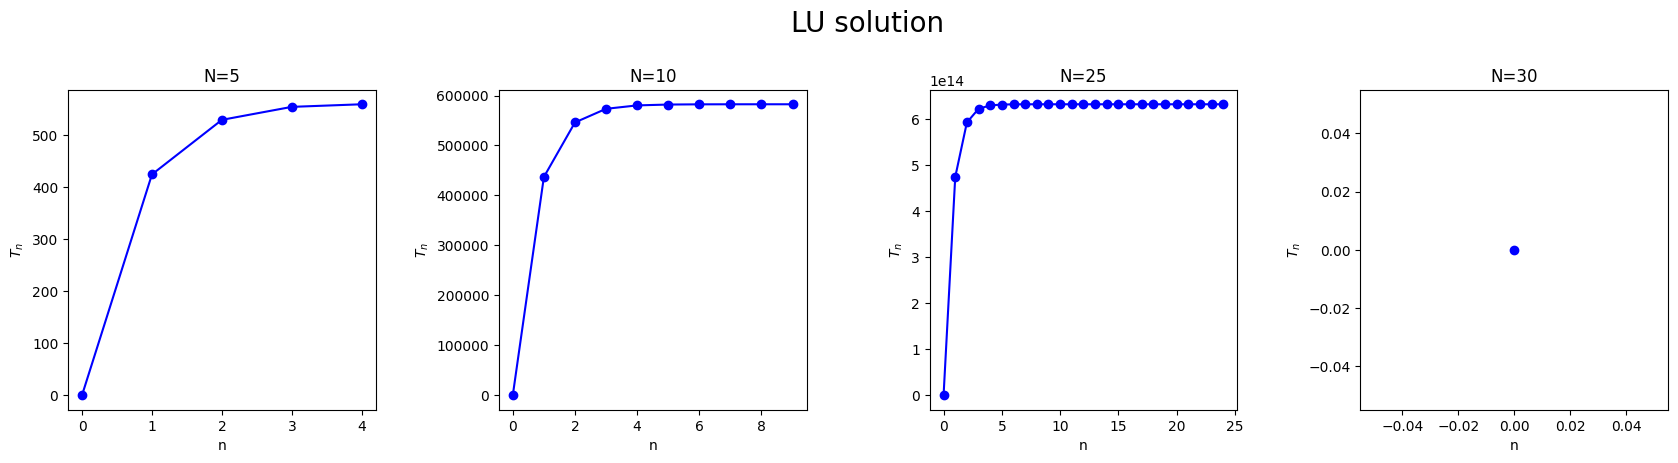

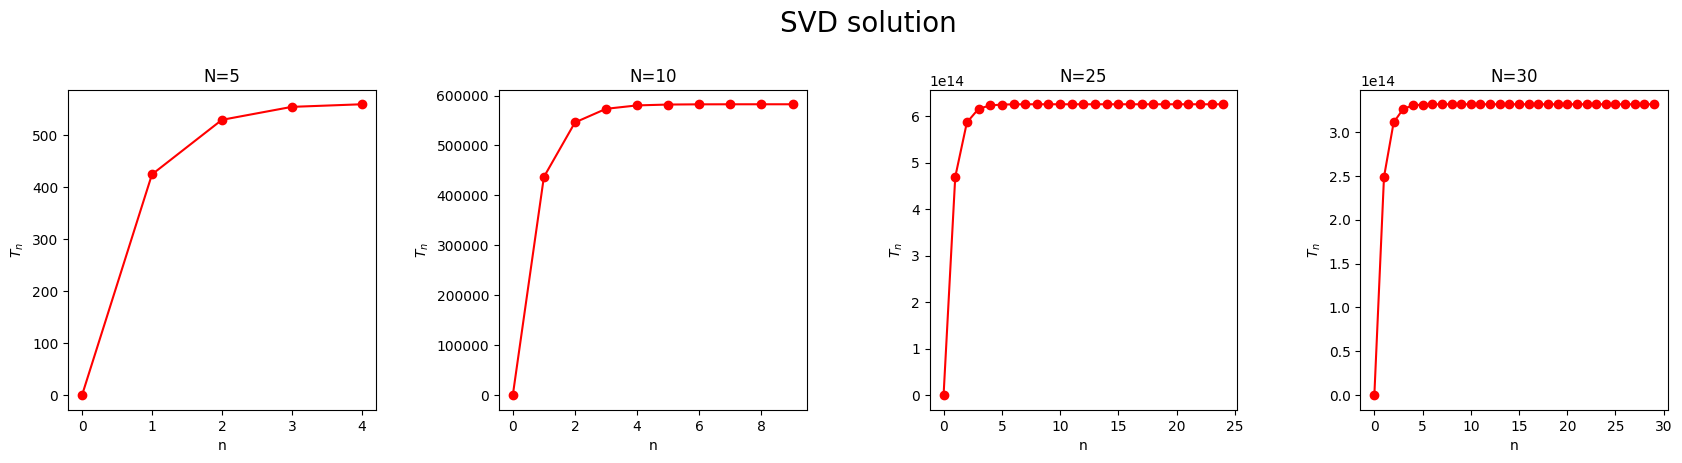

In [295]:
# plots
fig,axs=plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('LU solution',fontsize=20,y=1.1)
plt.subplots_adjust(left=0.1,
bottom=0.1,
right=0.9,
top=0.9,
wspace=0.4,
hspace=0.4)
fig1,axs1=plt.subplots(ncols=4, figsize=(20,4))
fig1.suptitle('SVD solution',fontsize=20,y=1.1)
plt.subplots_adjust(left=0.1,
bottom=0.1,
right=0.9,
top=0.9,
wspace=0.4,
hspace=0.4)

# matrix creation
def create_mat(N,p,q):
    diag = np.concatenate((np.ones(N-2),np.array([q])),axis=0)
    diag_down = q*np.ones(N-2)
    diag_up = p*np.ones(N-2)
    A = np.diag(diag)-np.diag(diag_down,-1)-np.diag(diag_up,1)
    return A

# LU 
def solve_LU(A,b):
    lU, piv = lu_factor(A)
    T_n_LU = lu_solve((lU, piv),b)
    T_n_total_LU = np.concatenate((np.array([0]),
                                   T_n_LU,np.array(
                                       [T_n_LU[-1]])),axis=0)
    return T_n_total_LU

# SVD
def solve_SVD(A,b):
    [U,W,V_T]=np.linalg.svd(A)
    T_n_SVD = V_T.T @ np.diag(1/W) @ U.T @ b
    T_n_total_SVD = np.concatenate((np.array([0]), 
                                    T_n_SVD,np.array(
                                        [T_n_SVD[-1]])),axis=0)
    return T_n_total_SVD

for i,N in enumerate(k):
    
    # variables
    N_vector=np.arange(0,N+1,1)
    b = np.ones(N-1)
    
    # create the matrix
    A = create_mat(N,p,q)
    
    # LU solution
    T_n_total_LU = solve_LU(A,b)
    
    # SVD solution
    T_n_total_SVD = solve_SVD(A,b)
    
    # plots
    axs[i].plot(N_vector[0:-1],T_n_total_LU[0:-1],'bo-')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('$T_n$')
    axs[i].set_title('N='+str(N))
    axs1[i].plot(N_vector[0:-1],T_n_total_SVD[0:-1],'ro-')
    axs1[i].set_xlabel('n')
    axs1[i].set_ylabel('$T_n$')
    axs1[i].set_title('N='+str(N))
    if i == len(N_val)-1:
        # set 1/W_min to zero
        [U,W,V_T]=np.linalg.svd(A)
        W_inv=1/W
        W_inv[-1]=0
        W_inv_mat = np.diag(W_inv)
        T_n_SVD = V_T.T @ W_inv_mat @ U.T @ b
        T_n_total_SVD = np.concatenate((np.array([0]),
                                        T_n_SVD,np.array(
                                            [T_n_SVD[-1]])),axis=0)

Text(0.5, 1.0, 'N=30')

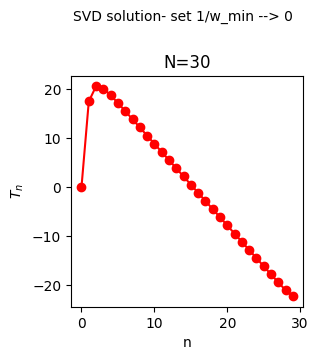

In [296]:
# plots
fig2,axs2=plt.subplots(ncols=1, figsize=(3,3))
fig2.suptitle('SVD solution- set 1/w_min --> 0',fontsize=10,y=1.1)
axs2.plot(N_vector[0:-1],T_n_total_SVD[0:-1],'ro-')
axs2.set_xlabel('n')
axs2.set_ylabel('$T_n$')
axs2.set_title('N='+str(N))

In [297]:
# parameters
N_val=np.arange(5,26,1)
norm_LU=np.zeros(21)
norm_SVD=np.zeros(21)

In [298]:
for i,N in enumerate(N_val):
    
    b = np.ones(N-1)
    
    # create the matrix
    A = create_mat(N,p,q)
    
    # LU solution
    P,l,u= lu(A)
    T_n_total_LU = solve_LU(A,b)
    
    # SVD solution
    [U,W,V_T]=np.linalg.svd(A)
    T_n_total_SVD = solve_SVD(A,b)
    
    norm_LU[i]=np.linalg.norm(P @ l @ u @ T_n_total_LU[1:-1] - b)
    norm_SVD[i]=np.linalg.norm(U @ np.diag(W) @ V_T @
                               T_n_total_SVD[1:-1] - b)

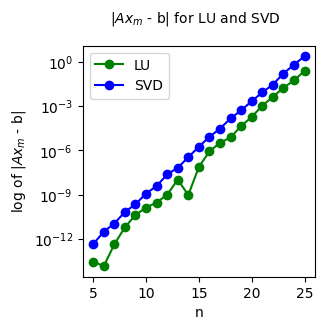

In [300]:
# plots
fig3,axs3=plt.subplots(ncols=1, figsize=(3,3))
fig3.suptitle('|$Ax_m$ - b| for LU and SVD',fontsize=10,y=1)
axs3.semilogy(N_val,norm_LU,'go-',label='LU')
axs3.semilogy(N_val,norm_SVD,'bo-',label='SVD')
axs3.set_xlabel('n')
axs3.set_ylabel('log of |$Ax_m$ - b|')
axs3.legend(loc='upper left')
plt.show()

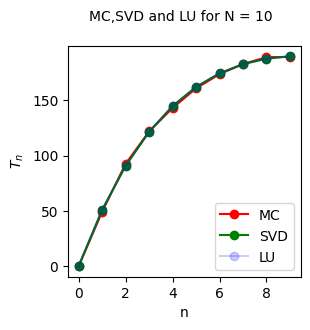

In [301]:
# variables
N=10
p=0.55
q=1-p
reals=10000
MC_array=np.zeros((reals,N-1))
N_vector=np.arange(0,N,1)
 
# MC simulation
def MonteCarlo(N,n,p):
    T=0
    while n>0:
        T=T+1
        if p>np.random.uniform(0,1):
            n=n+1
        else:
            n=n-1
        if n==N:
            n=N-1
    return T

for j in range(0,N-1):
    for i in range(0,reals-1):
        T = MonteCarlo(N,j+1,p)
        MC_array[i,j]=T
    
# calculate mean
mean_MC=np.mean(MC_array, axis=0)
mean_MC_inc_zero=np.concatenate((np.array([0]),mean_MC),axis=0)

# LU and SVD solutions
b = np.ones(N-1)
A = create_mat(N,p,q)
T_n_total_LU = solve_LU(A,b)
T_n_total_SVD = solve_SVD(A,b)

# plots
fig,ax= plt.subplots(ncols=1, figsize=(3,3))
fig.suptitle('MC,SVD and LU for N = '+str(N),fontsize=10,y=1)
ax.plot(N_vector,mean_MC_inc_zero,'ro-',label='MC')
ax.plot(N_vector,T_n_total_SVD[0:-1],'go-',label='SVD')
ax.plot(N_vector,T_n_total_LU[0:-1],'bo-',alpha=0.2,label='LU')
ax.legend(loc='lower right')
ax.set_xlabel('n')
ax.set_ylabel('$T_n$')
plt.show()

                

In [302]:
# variables
N_val=[100,200,300]
iters=10000
times_no_sparse=[0,0,0]
times_sparse=[0,0,0]

# matrix and vector creation
def rand_mat_vector(N, sparse = False):
    diag=np.random.normal(0,1,N)
    diag_down=np.random.normal(0,1,N-1)
    diag_up=np.random.normal(0,1,N-1)
    B = np.diag(diag)+np.diag(diag_down,-1)+np.diag(diag_up,1)
    Y = np.random.normal(0,1,N)
    if sparse:
        B = csr_matrix(B)
    return B,Y

def check_time(B,Y,iters,sparse = False):
    if sparse:
        t=0
        for j in range(0,iters):
            start=time.time()
            S = splu(B)
            S.solve(Y)
            end = time.time()
            t=t+(end - start)
    else:
        t=0
        for j in range(0,iters):
            start=time.time()
            lU, piv = lu_factor(B)
            lu_solve((lU, piv),Y)
            end = time.time()
            t=t+(end - start)
    return t/iters

for i,N in enumerate(N_val):
    result_no_sparse=rand_mat_vector(N)
    times_no_sparse[i]=check_time(result_no_sparse[0],result_no_sparse[1],
                                  iters)
    
    result_sparse=rand_mat_vector(N, sparse = True)
    times_sparse[i]=check_time(result_sparse[0],result_no_sparse[1],
                               iters,sparse = True)
    
print(f'The times for full matrix for N= {N_val} are: {times_no_sparse}')
print(' ')
print(f'The times for sparse matrix for N= {N_val} are: {times_sparse}') 


The times for full matrix for N= [100, 200, 300] are: [0.0019504877805709838, 0.004263416385650635, 0.00513128559589386]
 
The times for sparse matrix for N= [100, 200, 300] are: [0.00016479709148406983, 0.00019459373950958252, 0.00021112263202667237]
